## Approach 1:

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob # for reading multiple files
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
# Import the files
files = list(glob.glob("/kaggle/input/predict-ai-model-runtime/npz_all/npz/layout/nlp/random/train/*.npz"))

display(files)

In [9]:
# We can create a path dataframe, holding the path of each file
path_df = pd.DataFrame(files)

print("1. Path DataFrame:")
display(path_df)
print("")


print("2. Specific Path:")
display(print(path_df))
print("")

# We can use this the list of file names, to then access our specific files:

# create a 'data' object
data = np.load(file=files[0])

# read the .npz file names:
specific_file = dict(file=files[0])


print("3. Access The specific file:")
display(specific_file)


1. Path DataFrame:


""



2. Specific Path:
Empty DataFrame
Columns: []
Index: []


None

IndexError: list index out of range

In [ ]:
# Furthermore, we can also access the specific arrays as such:
print(data.keys())
for key in data.keys():
    print(key, data[key].shape)


In [94]:
# We can also create a function to loop through all our arrays, and understand what is held within (across all of them)
# Get a list of .npz file paths
data_npz_paths = glob.glob("/kaggle/input/predict-ai-model-runtime/npz_all/npz/layout/xla/default/test/*.npz")

print("1. Here, we can see the path of our different files")
print(data_npz_paths)
print("")

def print_array_info(file_path):
    try:
        # Load the .npz file
        data_npz = np.load(file_path)
        
        # List the array names in the .npz file
        array_names = data_npz.files

        for name in array_names:
            array = data_npz[name]
            print(f"File: {file_path}")
            print(f"Array Name: {name}")
            print(f"Array Shape: {array.shape}")

            # Check the dimensionality of the array
            if array.ndim == 1:
                print(f"The {name} array is 1D")
            elif array.ndim == 2:
                print(f"The {name} array is 2D")
            elif array.ndim == 3:
                print(f"The {name} array is 3D")
            print("")

    except Exception as e:
        print(f"Error: {str(e)}")

# Iterate through the first .npz file and print array information
for file_path in data_npz_paths[:1]:
    print_array_info(file_path)


1. Here, we can see the path of our different files
['/kaggle/input/predict-ai-model-runtime/npz_all/npz/layout/xla/default/test/cd708819d3f5103afd6460b15e74eaf3.npz', '/kaggle/input/predict-ai-model-runtime/npz_all/npz/layout/xla/default/test/05ae41e26dd3c4c06390371a0423233c.npz', '/kaggle/input/predict-ai-model-runtime/npz_all/npz/layout/xla/default/test/e8a3a1401b5e79f66d7037e424f3b6df.npz', '/kaggle/input/predict-ai-model-runtime/npz_all/npz/layout/xla/default/test/fbaa8bb6a1aed9988281085c91065c05.npz', '/kaggle/input/predict-ai-model-runtime/npz_all/npz/layout/xla/default/test/937ee0eb0d5d6151b7b8252933b5c1c9.npz', '/kaggle/input/predict-ai-model-runtime/npz_all/npz/layout/xla/default/test/3e7156ac468dfb75cf5c9615e1e5887d.npz', '/kaggle/input/predict-ai-model-runtime/npz_all/npz/layout/xla/default/test/5335ed13823b0a518ee3c79ba4425f34.npz', '/kaggle/input/predict-ai-model-runtime/npz_all/npz/layout/xla/default/test/db59a991b7c607634f13570d52ce885f.npz']

File: /kaggle/input/predic

## Analysis
### Part 1: Understanding the Array Objects

We can clearly begin to understand the numpy array files we are working with, their arrays, and the information held within them. Within the XLA default layout file, we find a:

1. node_feat (Node Features) array:

This array likely contains features associated with nodes in a graph.
It is two-dimensional with a shape of (n, 140), where n is the number of nodes.
Each row represents a feature vector for a node, and there are 140 features in each vector.
The features in this array are associated with the nodes in the graph.


2. node_opcode array:

This array appears to store operation codes for nodes in the graph.
It is one-dimensional with a shape of (n,), where n is the number of nodes.
Each entry in this array corresponds to the opcode for a specific node.
Opcode values are used to represent the type of operation or instruction associated with each node.


3. edge_index array:

This array represents the edges in the graph.
It is two-dimensional with a shape of (m, 2), where m is the number of edges.
Each row [u, v] in this array indicates a directed edge from node u to node v.
The direction of the edge indicates that node u consumes the output tensor of node v.


4. node_config_feat array:

This array likely contains configuration features for different runs of the graph.
It is three-dimensional with a shape of (c, nc, 18), where c represents the number of runs, and nc represents the number of configurable nodes.
The entries in this array are configuration feature vectors.
These features may influence how the graph is compiled and executed for different configurations.


5. node_config_ids array:

This array holds integer values indicating the indices of configurable nodes.
It is one-dimensional with a shape of (nc,), where nc is the number of configurable nodes.
Each entry specifies which nodes in the graph are configurable.


6. config_runtime array:

This array stores the runtime (in nanoseconds) for different graph configurations.
It is one-dimensional with a shape of (c,), where c is the number of runs or configurations.
Each entry represents the runtime for a specific configuration.


7. node_splits array (optional):

This variable-length list contains node IDs that mark the starting points of HLO computations in the graph.
It can be used to partition the graph into multiple segments, especially for computational purposes.



In [67]:
# Furthermore, we access the specific arrays as such:
print(data.keys())
for key in data.keys():
    print(key, data[key].shape)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7d9b76b14370>)
edge_index (1366, 2)
node_feat (876, 140)
node_opcode (876,)
node_config_feat (100040, 40, 18)
node_config_ids (40,)
node_splits (1, 2)
config_runtime (100040,)


## Approach 2: 




In [68]:
# Here, we attempt to access the file names, and understand how many .npz files there are in each directory. Here, we examine the 'xla default/layout' arrays

dir_path = '/kaggle/input/predict-ai-model-runtime/npz_all/npz/layout/xla/default/test/'

file_names = os.listdir(dir_path)

file_names = [file_name for file_name in file_names if file_name.endswith('.npz')]

file_names = sorted(file_names)

file_names = file_names[:1000]

test_data_df = pd.DataFrame(file_names, columns=['File Name'])

test_data_df['File Path'] = test_data_df['File Name'].apply(lambda x: os.path.join(dir_path, x))

test_data_df

,File Name,File Path
0,05ae41e26dd3c4c06390371a0423233c.npz,/kaggle/input/predict-ai-model-runtime/npz_all...
1,3e7156ac468dfb75cf5c9615e1e5887d.npz,/kaggle/input/predict-ai-model-runtime/npz_all...
2,5335ed13823b0a518ee3c79ba4425f34.npz,/kaggle/input/predict-ai-model-runtime/npz_all...
3,937ee0eb0d5d6151b7b8252933b5c1c9.npz,/kaggle/input/predict-ai-model-runtime/npz_all...
4,cd708819d3f5103afd6460b15e74eaf3.npz,/kaggle/input/predict-ai-model-runtime/npz_all...
5,db59a991b7c607634f13570d52ce885f.npz,/kaggle/input/predict-ai-model-runtime/npz_all...
6,e8a3a1401b5e79f66d7037e424f3b6df.npz,/kaggle/input/predict-ai-model-runtime/npz_all...
7,fbaa8bb6a1aed9988281085c91065c05.npz,/kaggle/input/predict-ai-model-runtime/npz_all...


# Part 2: Visualization


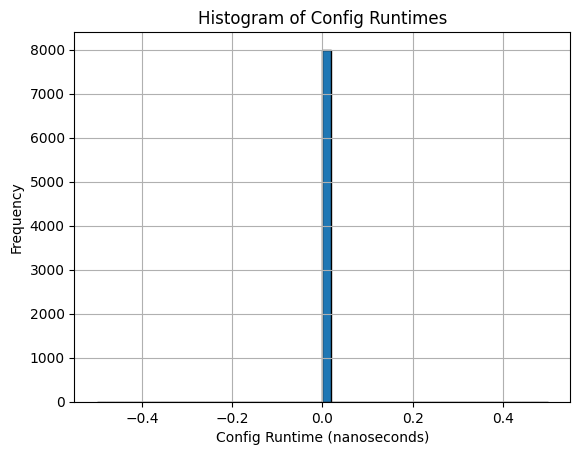

In [73]:
# This code defines a function plot_config_runtime_histogram that takes the directory path containing the .npz files as input.
#It then extracts the config_runtime arrays from all the files, concatenates them into a single list, and plots a histogram.

def plot_config_runtime_histogram(data_dir):
    # Get a list of .npz file paths
    data_npz_paths = glob.glob(data_dir + "/*.npz")

    # Initialize an empty list to store config runtimes
    config_runtimes = []

    # Iterate through each .npz file and extract config runtimes
    for file_path in data_npz_paths:
        try:
            # Load the .npz file
            data_npz = np.load(file_path)
            
            # Extract the config_runtime array
            config_runtime = data_npz["config_runtime"]
            
            # Append config runtimes to the list
            config_runtimes.extend(config_runtime)
        
        except Exception as e:
            print(f"Error: {str(e)}")

    # Create a histogram of config runtimes
    plt.hist(config_runtimes, bins=50, edgecolor='k')
    plt.xlabel("Config Runtime (nanoseconds)")
    plt.ylabel("Frequency")
    plt.title("Histogram of Config Runtimes")
    plt.grid(True)
    plt.show()

# Specify the directory where your .npz files are located
data_directory = "/kaggle/input/predict-ai-model-runtime/npz_all/npz/layout/xla/default/test"

# Call the function to plot the histogram
plot_config_runtime_histogram(data_directory)


In [75]:
def get_runtime_stats(file):
    data = np.load(file)
    runtime = data['config_runtime']
    return {
        "min": np.min(runtime), 
        "max": np.max(runtime), 
        "avg": np.mean(runtime),
        "range": (np.max(runtime) - np.min(runtime)) / np.min(runtime)
    }

runtime_stats_df = pd.DataFrame(map(get_runtime_stats, files))



### Histogram Analysis: Average Runtime

The histogram representing the distribution of the average runtime showcases several key features and patterns:

### Dominant Peak: 
The dominant peak, located between x-values of [0.00,0.08], is the most noticeable feature of the histogram. It reaches its zenith at approximately y = 175. This suggests that a substantial number of samples have an average runtime within this range. This also implies that the majority of the computational tasks in the dataset complete quite rapidly.

### Sharp Decline:
Post the dominant peak, there's a pronounced decline in the frequency, especially between x = [0.08,0.12-0.15], where the frequency drops drastically to around y = 18. Such a steep drop indicates that fewer samples fall into this runtime range.

### Sparse Frequency Zones:
The areas in the histogram where x ranges from [0.20,0.24] and [0.75,0.80] are characterized by low frequencies, around 4 and 2-3 respectively. These low frequencies indicate that fewer samples or tasks take this amount of time to complete, making these runtimes less common.

### Minor Peaks:
There are a couple of minor peaks or rises in the histogram, notably between x = [.23,.25] and [0.25,0.28], suggesting there are certain runtimes that are more frequent than their immediate neighbors.

### Valleys or Gaps:
Certain sections of the histogram, especially between x = [0.50,0.75], exhibit zero frequency. This means that there were no observed average runtimes in this range for the given dataset.

### Anomalies:
The histogram has unexpected rises in the frequency at later x-values, especially around x = [0.75,0.8] and x = [1.4,1.6]. Though these frequencies (2-3 and 1-2 respectively) are low, their mere presence is intriguing because they are isolated from other populated sections of the histogram.

## Interpretation:

1. The majority of the tasks in the dataset complete very quickly, with a considerable number completing within the range [0.00,0.08].

2. There are specific runtime ranges that are less common, resulting in valleys in the histogram.

3. The presence of anomalies or unexpected rises in frequency at certain runtime ranges suggests the existence of outlier tasks that don't follow the general trend.

4. In a practical context, understanding such a distribution can be invaluable. For tasks or computations that fall within the dominant peak, standard computational resources might suffice. For those in the sparse or anomalous regions, specialized investigation or resources might be needed to optimize performance.

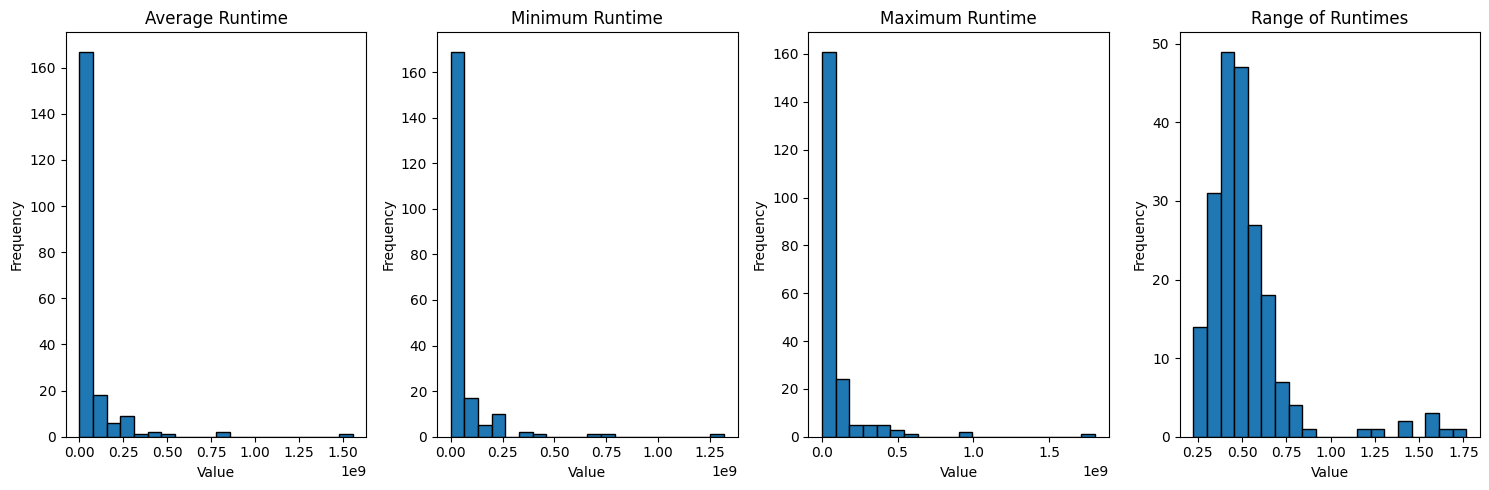

In [76]:

# Create subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))

# Plot histograms
ax1.hist(runtime_stats_df['avg'], bins=20, edgecolor='black')
ax2.hist(runtime_stats_df['min'], bins=20, edgecolor='black')
ax3.hist(runtime_stats_df['max'], bins=20, edgecolor='black')
ax4.hist(runtime_stats_df['range'], bins=20, edgecolor='black')

# Set titles and labels
ax1.set_title('Average Runtime')
ax2.set_title('Minimum Runtime')
ax3.set_title('Maximum Runtime')
ax4.set_title('Range of Runtimes')

ax1.set_xlabel('Value')
ax2.set_xlabel('Value')
ax3.set_xlabel('Value')
ax4.set_xlabel('Value')

ax1.set_ylabel('Frequency')
ax2.set_ylabel('Frequency')
ax3.set_ylabel('Frequency')
ax4.set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

In [96]:
def get_normalized_runtime_stats(file: str):
    data = np.load(file)
    runtime = data['config_runtime'].astype(np.float32)
    
    # Normalization using L2 norm
    l2_norm = np.linalg.norm(runtime)
    if l2_norm != 0:  # Avoid division by zero
        runtime /= l2_norm
        
    return {
        "min": np.min(runtime), 
        "max": np.max(runtime), 
        "avg": np.mean(runtime),
        "range": (np.max(runtime) - np.min(runtime)) / np.min(runtime) if np.min(runtime) != 0 else np.nan
    }

normalized_runtime_stats_df = pd.DataFrame(map(get_normalized_runtime_stats, files))
                                           
    
    
# Note:
# I added a condition to check if the L2 norm isn't zero before performing the normalization to avoid dividing by zero.
# Similarly, a check was added in the "range" computation to ensure that the minimum runtime isn't zero, which would cause a division by zero error.

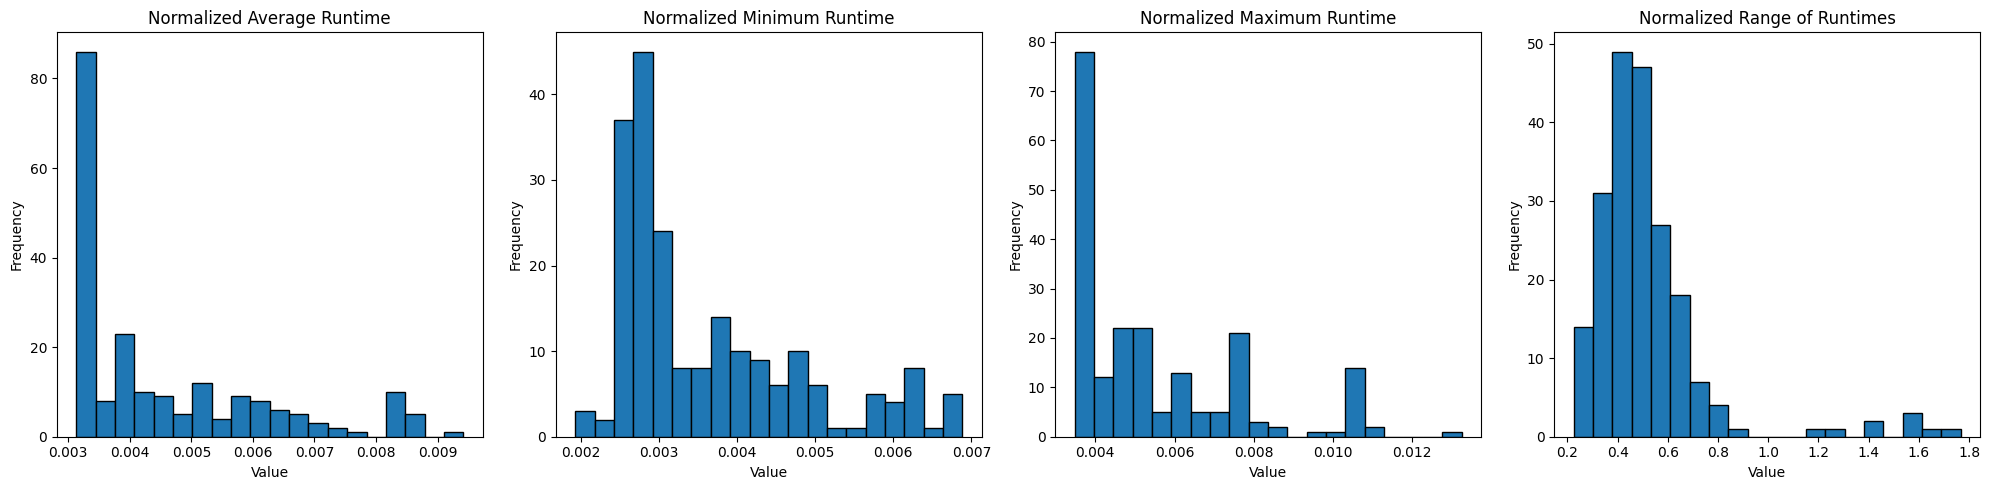

In [97]:


# Create subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))

# Plot histograms
ax1.hist(normalized_runtime_stats_df['avg'], bins=20, edgecolor='black')
ax2.hist(normalized_runtime_stats_df['min'], bins=20, edgecolor='black')
ax3.hist(normalized_runtime_stats_df['max'], bins=20, edgecolor='black')
ax4.hist(normalized_runtime_stats_df['range'].dropna(), bins=20, edgecolor='black') # dropping NaN values for range

# Set titles and labels
ax1.set_title('Normalized Average Runtime')
ax2.set_title('Normalized Minimum Runtime')
ax3.set_title('Normalized Maximum Runtime')
ax4.set_title('Normalized Range of Runtimes')

ax1.set_xlabel('Value')
ax2.set_xlabel('Value')
ax3.set_xlabel('Value')
ax4.set_xlabel('Value')

ax1.set_ylabel('Frequency')
ax2.set_ylabel('Frequency')
ax3.set_ylabel('Frequency')
ax4.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()
